In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load dataset
df = pd.read_csv('../data/garmin/sleep.csv', sep=',')

# Trim columns
df = df.loc[:, ['User First Name', 'Calendar Date (Local)', 'Start Time (Local)', 'End Time (Local)', 'Duration (s)', 'Rem Sleep Duration (s)', 'Deep Sleep Duration (s)', 'Light Sleep Duration (s)', 'Source']]

df

,User First Name,Calendar Date (Local),Start Time (Local),End Time (Local),Duration (s),Rem Sleep Duration (s),Deep Sleep Duration (s),Light Sleep Duration (s),Source
0,P10,2023-12-22,2023-12-22T01:17:00,2023-12-22T09:03:00,27960,8400,3000,16560,device
1,P10,2023-12-22,2023-12-22T01:17:00,2023-12-22T09:03:00,27960,8400,3000,16560,device
2,P10,2023-12-22,2023-12-22T01:17:00,2023-12-22T09:03:00,27960,8400,3000,16560,device
3,P10,2023-12-22,2023-12-22T01:17:00,2023-12-22T09:03:00,27960,8400,3000,16560,device
4,P10,2023-12-22,2023-12-22T01:17:00,2023-12-22T09:03:00,27960,8400,3000,16560,device
...,...,...,...,...,...,...,...,...,...
3791,P14,2024-01-08,2024-01-08T00:01:00,2024-01-08T07:34:00,27180,4140,6600,16380,device
3792,P14,2024-01-08,2024-01-08T00:01:00,2024-01-08T07:34:00,27180,4140,6600,16380,device
3793,P14,2024-01-08,2024-01-08T00:01:00,2024-01-08T07:34:00,27180,4140,6600,16380,device
3794,P14,2024-01-08,2024-01-08T00:01:00,2024-01-08T07:34:00,27180,4140,6600,16380,device


In [4]:
# Select records for one user
p_df = df[df['User First Name'] == 'P14']
p_df

,User First Name,Calendar Date (Local),Start Time (Local),End Time (Local),Duration (s),Rem Sleep Duration (s),Deep Sleep Duration (s),Light Sleep Duration (s),Source
2709,P14,2023-12-21,2023-12-21T23:42:00,2023-12-22T07:36:00,28440,7980,3420,16320,device
2710,P14,2023-12-21,2023-12-21T23:42:00,2023-12-22T07:36:00,28440,7980,3420,16320,device
2711,P14,2023-12-21,2023-12-21T23:42:00,2023-12-22T07:36:00,28440,7980,3420,16320,device
2712,P14,2023-12-21,2023-12-21T23:42:00,2023-12-22T07:36:00,28440,7980,3420,16320,device
2713,P14,2023-12-21,2023-12-21T23:42:00,2023-12-22T07:36:00,28440,7980,3420,16320,device
...,...,...,...,...,...,...,...,...,...
3791,P14,2024-01-08,2024-01-08T00:01:00,2024-01-08T07:34:00,27180,4140,6600,16380,device
3792,P14,2024-01-08,2024-01-08T00:01:00,2024-01-08T07:34:00,27180,4140,6600,16380,device
3793,P14,2024-01-08,2024-01-08T00:01:00,2024-01-08T07:34:00,27180,4140,6600,16380,device
3794,P14,2024-01-08,2024-01-08T00:01:00,2024-01-08T07:34:00,27180,4140,6600,16380,device


In [5]:
# Load glucose dataset
glucose_df = pd.read_csv('../data/P14/supersapiens/merged.csv', sep=';')

# Convert timestamp
glucose_df['recorded_timestamp'] = pd.to_datetime(glucose_df['recorded_timestamp'])

glucose_df

,glucose,recorded_timestamp
0,97,2023-12-23 05:26:54
1,97,2023-12-23 05:41:54
2,99,2023-12-23 05:56:54
3,98,2023-12-23 06:11:54
4,96,2023-12-23 06:26:54
...,...,...
10901,101,2023-12-28 23:55:01
10902,103,2023-12-28 23:56:03
10903,103,2023-12-28 23:57:03
10904,103,2023-12-28 23:58:04


In [6]:
# Group glucose by day
glucose_mean_per_day = pd.DataFrame(glucose_df.groupby(glucose_df['recorded_timestamp'].dt.date)['glucose'].mean())

# Change index data type
glucose_mean_per_day.index = pd.to_datetime(glucose_mean_per_day.index)

glucose_mean_per_day

,glucose
recorded_timestamp,
2023-12-21,101.981221
2023-12-22,119.200472
2023-12-23,104.473684
2023-12-24,92.869198
2023-12-25,99.764344
2023-12-26,91.634812
2023-12-27,94.319737
2023-12-28,96.112903
2023-12-29,87.202888


# Aggregate average glucose level of the day with sleep data

In [7]:
# Convert column type
glucose_mean_per_day.index = pd.to_datetime(glucose_mean_per_day.index)
p_df['Calendar Date (Local)'] = pd.to_datetime(p_df['Calendar Date (Local)'])

# Join Garmin Dataset with Glucose Data
p_df_merged = pd.merge(p_df, glucose_mean_per_day, left_on='Calendar Date (Local)', how='inner', right_index=True)

p_df_merged

C:\Users\bjoer\AppData\Local\Temp\ipykernel_6936\165701922.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_df['Calendar Date (Local)'] = pd.to_datetime(p_df['Calendar Date (Local)'])


,User First Name,Calendar Date (Local),Start Time (Local),End Time (Local),Duration (s),Rem Sleep Duration (s),Deep Sleep Duration (s),Light Sleep Duration (s),Source,glucose
2709,P14,2023-12-21,2023-12-21T23:42:00,2023-12-22T07:36:00,28440,7980,3420,16320,device,101.981221
2710,P14,2023-12-21,2023-12-21T23:42:00,2023-12-22T07:36:00,28440,7980,3420,16320,device,101.981221
2711,P14,2023-12-21,2023-12-21T23:42:00,2023-12-22T07:36:00,28440,7980,3420,16320,device,101.981221
2712,P14,2023-12-21,2023-12-21T23:42:00,2023-12-22T07:36:00,28440,7980,3420,16320,device,101.981221
2713,P14,2023-12-21,2023-12-21T23:42:00,2023-12-22T07:36:00,28440,7980,3420,16320,device,101.981221
...,...,...,...,...,...,...,...,...,...,...
3727,P14,2024-01-03,2024-01-03T23:42:00,2024-01-04T07:16:00,27240,6360,3360,17520,device,110.680769
3728,P14,2024-01-03,2024-01-03T23:42:00,2024-01-04T07:16:00,27240,6360,3360,17520,device,110.680769
3729,P14,2024-01-03,2024-01-03T23:42:00,2024-01-04T07:16:00,27240,6360,3360,17520,device,110.680769
3730,P14,2024-01-03,2024-01-03T23:42:00,2024-01-04T07:16:00,27240,6360,3360,17520,device,110.680769


In [8]:
# Trim columns
#sleep_glucose_df = p_df_merged.loc[:, ['User First Name', 'Calendar Date (Local)', 'Start Time (Local)', 'End Time (Local)', 'Duration (s)', 'Rem Sleep Duration (s)', 'Deep Sleep Duration (s)', 'Light Sleep Duration (s)', 'Source']]
sleep_glucose_df = p_df_merged.drop_duplicates(ignore_index=True)

sleep_glucose_df

,User First Name,Calendar Date (Local),Start Time (Local),End Time (Local),Duration (s),Rem Sleep Duration (s),Deep Sleep Duration (s),Light Sleep Duration (s),Source,glucose
0,P14,2023-12-21,2023-12-21T23:42:00,2023-12-22T07:36:00,28440,7980,3420,16320,device,101.981221
1,P14,2023-12-22,2023-12-22T22:50:00,2023-12-23T06:16:00,26760,5460,5940,15240,device,119.200472
2,P14,2023-12-24,2023-12-24T00:05:00,2023-12-24T09:45:00,34800,10080,5760,18780,device,92.869198
3,P14,2023-12-25,2023-12-25T00:10:00,2023-12-25T08:52:00,31320,5640,4380,20580,device,99.764344
4,P14,2023-12-26,2023-12-26T00:03:00,2023-12-26T09:58:00,35700,8400,5040,22020,device,91.634812
5,P14,2023-12-26,2023-12-26T22:48:00,2023-12-27T07:03:55,29755,3955,6780,18720,device,91.634812
6,P14,2023-12-27,2023-12-27T02:06:00,2023-12-27T07:03:55,17875,3955,1740,12060,device,94.319737
7,P14,2023-12-27,2023-12-27T06:43:00,2023-12-27T14:01:00,26280,0,0,11100,server,94.319737
8,P14,2023-12-27,2023-12-27T08:16:00,2023-12-27T14:01:00,20700,0,0,8820,server,94.319737
9,P14,2023-12-27,2023-12-27T08:43:00,2023-12-27T14:01:00,19080,0,0,7440,server,94.319737


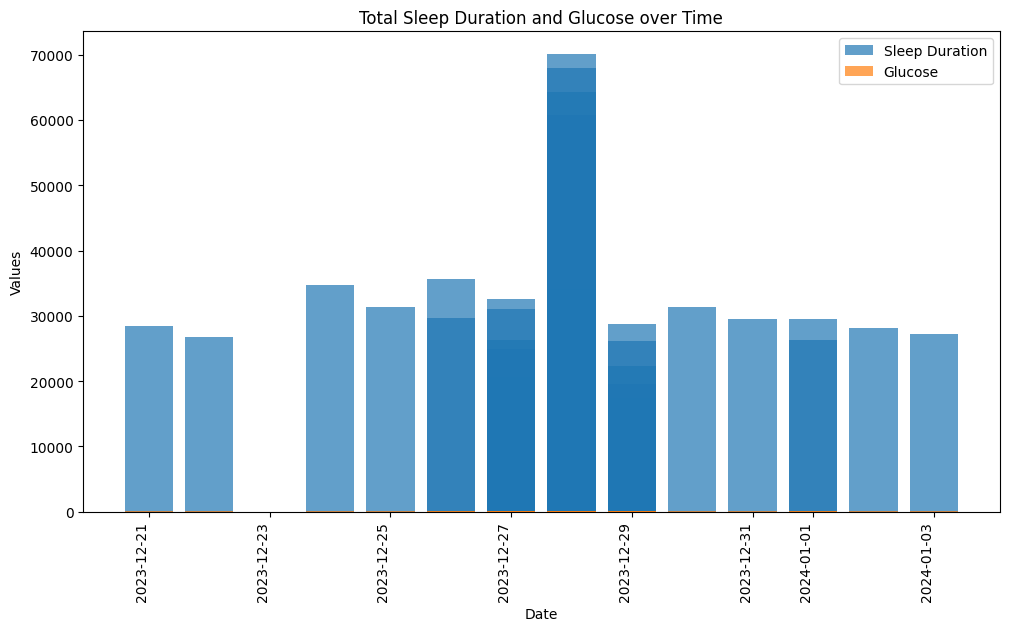

In [9]:
# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(sleep_glucose_df['Calendar Date (Local)'], sleep_glucose_df['Duration (s)'], label='Sleep Duration', alpha=0.7)
plt.bar(sleep_glucose_df['Calendar Date (Local)'], sleep_glucose_df['glucose'], label='Glucose', alpha=0.7)

# Format the x-axis labels
plt.xticks(rotation=90, ha='right')
plt.tight_layout()

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Total Sleep Duration and Glucose over Time')

# Display legend
plt.legend()

# Show the plot
plt.show()

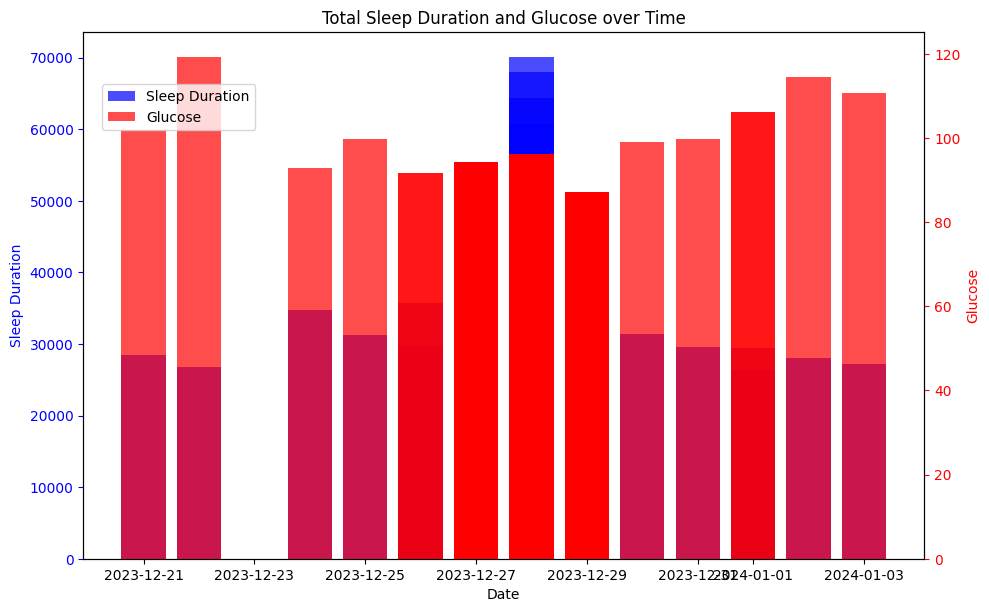

In [10]:
# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot 'sleepDuration' on the primary y-axis
ax1.bar(sleep_glucose_df['Calendar Date (Local)'], sleep_glucose_df['Duration (s)'], label='Sleep Duration', alpha=0.7, color='b')
ax1.set_xlabel('Date')
ax1.set_ylabel('Sleep Duration', color='b')
ax1.tick_params('y', colors='b')

# Create a secondary y-axis for 'glucose'
ax2 = ax1.twinx()
ax2.bar(sleep_glucose_df['Calendar Date (Local)'], sleep_glucose_df['glucose'], label='Glucose', alpha=0.7, color='r')
ax2.set_ylabel('Glucose', color='r')
ax2.tick_params('y', colors='r')

# Format the x-axis labels
plt.xticks(rotation=45, ha='right')
#plt.xticks(df['Calendar Date (Local)'], rotation=90, ha='right', fontsize=8)
plt.tight_layout()

# Set title
plt.title('Total Sleep Duration and Glucose over Time')

# Display legend
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))

# Show the plot
plt.show()

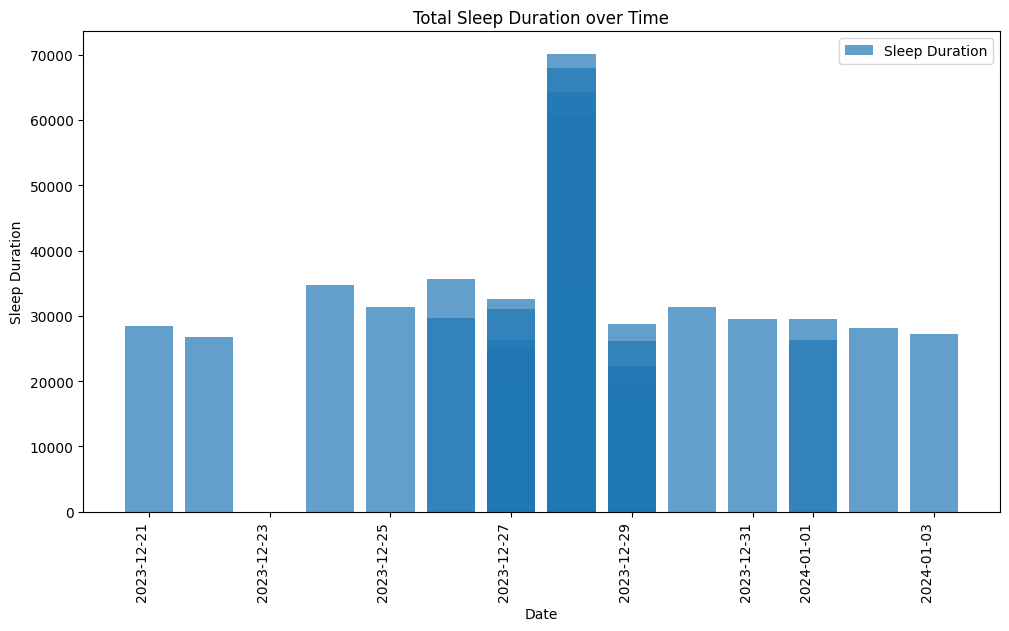

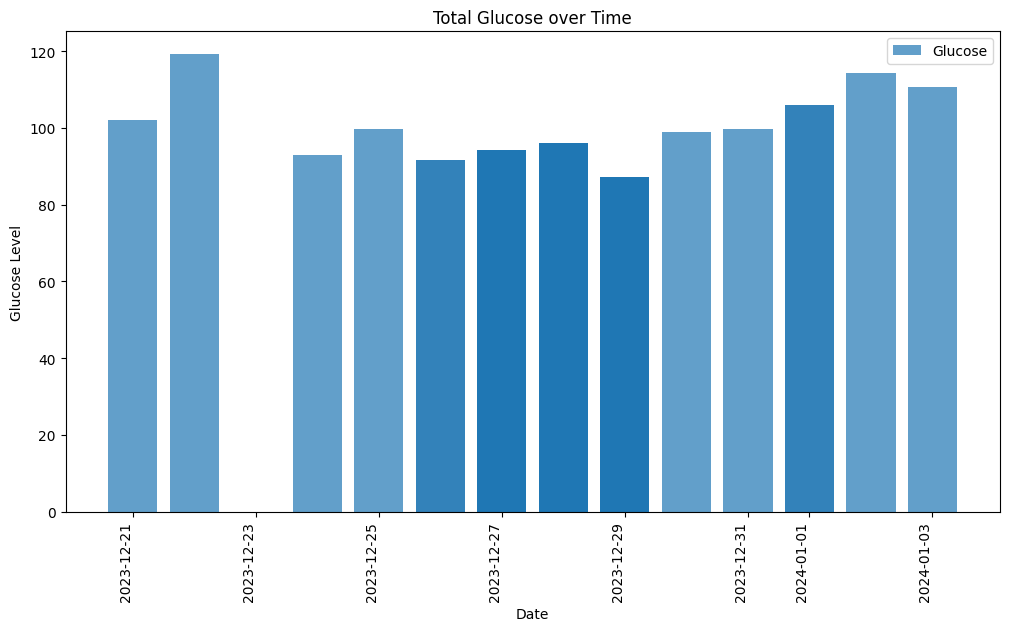

In [11]:
# Create a bar chart
plt.figure(figsize=(10, 6))

plt.bar(sleep_glucose_df['Calendar Date (Local)'], sleep_glucose_df['Duration (s)'], label='Sleep Duration', alpha=0.7)

# Format the x-axis labels
plt.xticks(rotation=90, ha='right')
plt.tight_layout()

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Sleep Duration')
plt.title('Total Sleep Duration over Time')

# Display legend
plt.legend()

# Show the plot
plt.show()

# Create a bar chart
plt.figure(figsize=(10, 6))

# Create a bar chart
plt.bar(sleep_glucose_df['Calendar Date (Local)'], sleep_glucose_df['glucose'], label='Glucose', alpha=0.7)

# Format the x-axis labels
plt.xticks(rotation=90, ha='right')
plt.tight_layout()

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Glucose Level')
plt.title('Total Glucose over Time')

# Display legend
plt.legend()

# Show the plot
plt.show()

# Correlation between Sleep Duration and Glucose Level

Correlation Coefficient: 0.183445287305828


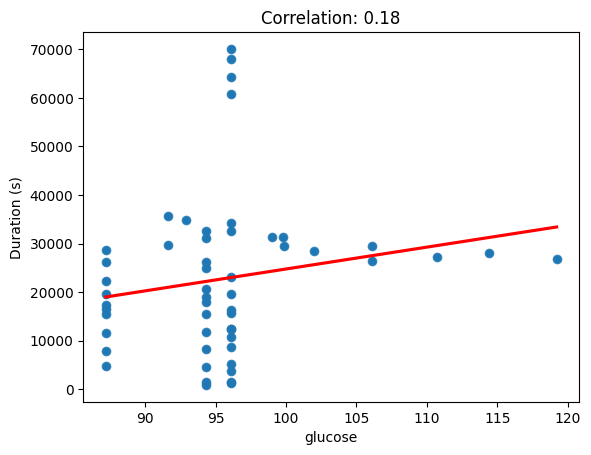

In [12]:
column1 = sleep_glucose_df['glucose']
column2 = sleep_glucose_df['Duration (s)']

# Calculate the correlation coefficient
correlation_coefficient = column1.corr(column2)

print(f'Correlation Coefficient: {correlation_coefficient}')

# Create a scatter plot
sns.scatterplot(x=column1, y=column2)

# Add a regression line and correlation coefficient
sns.regplot(x=column1, y=column2, ci=None, line_kws={'color': 'red'})
plt.title(f'Correlation: {column1.corr(column2):.2f}')

# Display the plot
plt.show()

As the correlation coefficient is close to zero, it indicates that there is almost no linear relationship between the two columns. 

Correlation Coefficient: 0.32586590582363195


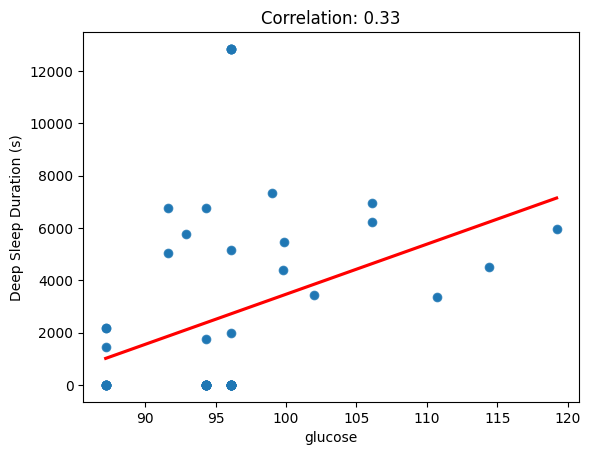

In [13]:
column1 = sleep_glucose_df['glucose']
column2 = sleep_glucose_df['Deep Sleep Duration (s)']

# Calculate the correlation coefficient
correlation_coefficient = column1.corr(column2)

print(f'Correlation Coefficient: {correlation_coefficient}')

# Create a scatter plot
sns.scatterplot(x=column1, y=column2)

# Add a regression line and correlation coefficient
sns.regplot(x=column1, y=column2, ci=None, line_kws={'color': 'red'})
plt.title(f'Correlation: {column1.corr(column2):.2f}')

# Display the plot
plt.show()

A correlation coefficient of approximately -0.43 indicates a moderate negative correlation between the two variables. The negative sign suggests that as one variable increases, the other tends to decrease, and vice versa. The magnitude of -0.43 suggests that the relationship is stronger than a weak correlation but not extremely strong.

Correlation Coefficient: 0.14114249285921698


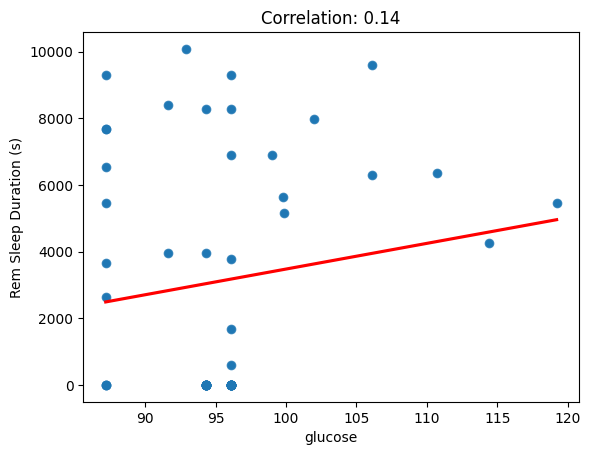

In [14]:
column1 = sleep_glucose_df['glucose']
column2 = sleep_glucose_df['Rem Sleep Duration (s)']

# Calculate the correlation coefficient
correlation_coefficient = column1.corr(column2)

print(f'Correlation Coefficient: {correlation_coefficient}')

# Create a scatter plot
sns.scatterplot(x=column1, y=column2)

# Add a regression line and correlation coefficient
sns.regplot(x=column1, y=column2, ci=None, line_kws={'color': 'red'})
plt.title(f'Correlation: {column1.corr(column2):.2f}')

# Display the plot
plt.show()

Correlation Coefficient: 0.31922258739828363


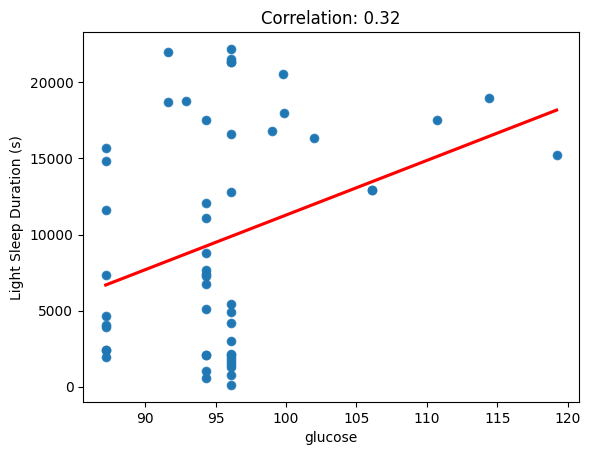

In [15]:
column1 = sleep_glucose_df['glucose']
column2 = sleep_glucose_df['Light Sleep Duration (s)']

# Calculate the correlation coefficient
correlation_coefficient = column1.corr(column2)

print(f'Correlation Coefficient: {correlation_coefficient}')

# Create a scatter plot
sns.scatterplot(x=column1, y=column2)

# Add a regression line and correlation coefficient
sns.regplot(x=column1, y=column2, ci=None, line_kws={'color': 'red'})
plt.title(f'Correlation: {column1.corr(column2):.2f}')

# Display the plot
plt.show()